In [1]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from warnings import filterwarnings
filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
bl = pd.read_excel('bplm.xlsx')
bl.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
bl.columns = bl.columns.str.lower()
bl.columns = bl.columns.str.replace(' ','_')

In [4]:
bl['zip_code'] = bl['zip_code'].astype(str)
bl['id'] = bl['id'].astype(str)

In [5]:
bl1 = bl.loc[bl['personal_loan']==1]
bl0 = bl.loc[bl['personal_loan']==0]

bl1_samp = bl1.sample(400)
bl0_samp = bl0.sample(400)

bldfc = pd.concat([bl1_samp, bl0_samp])
bldfc['personal_loan'].value_counts()

0    400
1    400
Name: personal_loan, dtype: int64

In [6]:
bl_unseen = bldfc.sample(frac=0.20)

bl_train = bldfc.sample(frac=0.80)

In [7]:
bl_train.shape

(640, 14)

In [8]:
bl_train.columns

Index(['id', 'age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'personal_loan', 'securities_account',
       'cd_account', 'online', 'creditcard'],
      dtype='object')

In [ ]:
##Logistic Regression Model

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        58
           1       0.90      0.93      0.92        70

    accuracy                           0.91       128
   macro avg       0.91      0.90      0.91       128
weighted avg       0.91      0.91      0.91       128

accuracy_train =  0.8848
accuracy_test =  0.9062
cross validatio score =  0.8688
Accuracy is:  0.90625


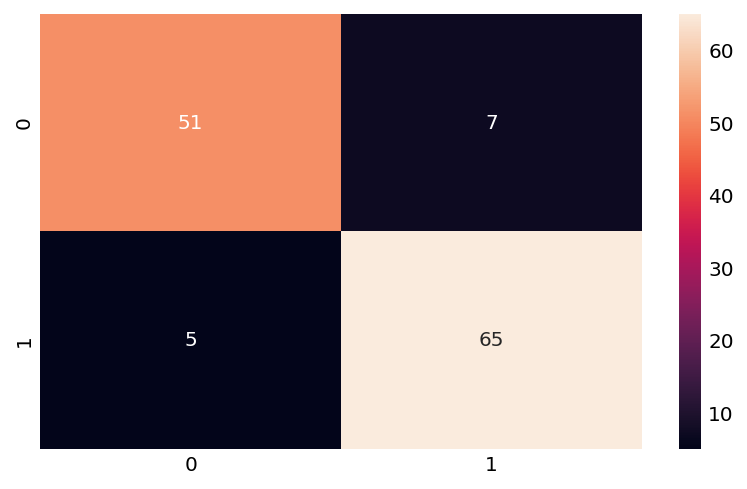

In [10]:
#Using all features on training set

target_col = 'personal_loan'
feature_cols = ['age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'securities_account',
       'cd_account', 'online', 'creditcard']
X = bl_train[feature_cols]
y = bl_train[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lg_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lg_model.fit(X_train, y_train)
lg_model_score = cross_val_score(lg_model, X, y, cv=5)

y_pred = lg_model.predict(X_test)

y_pp = lg_model.predict_proba(X_test)

#Create the confusion matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test, y_pred))

print('accuracy_train = {:7.4f}'.format(lg_model.score(X_train, y_train)))
print('accuracy_test = {:7.4f}'.format(lg_model.score(X_test, y_test)))
print('cross validatio score = {:7.4f}'.format(lg_model_score.mean()))
print('Accuracy is: ', ac)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        58
           1       0.91      0.91      0.91        70

    accuracy                           0.91       128
   macro avg       0.91      0.91      0.91       128
weighted avg       0.91      0.91      0.91       128

accuracy_train_r =  0.8867
accuracy_test_r =  0.9062
cross validatio score_r =  0.8922
Accuracy is:  0.90625


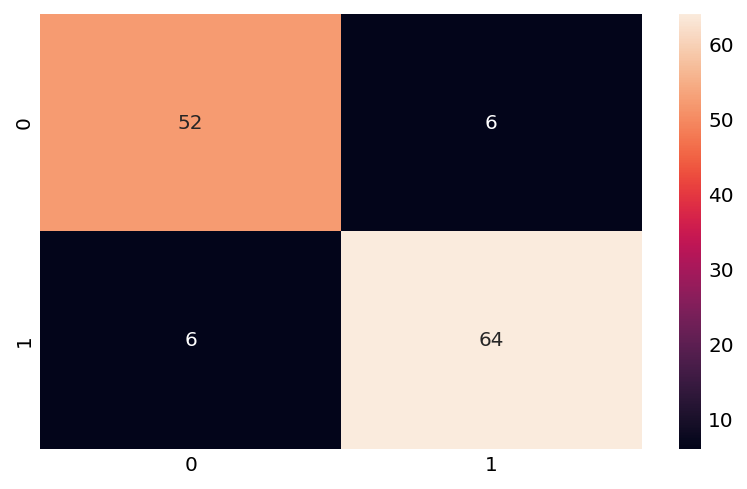

In [12]:
#Using reduced features on training set

target_col = 'personal_loan'
feature_reduced = ['income', 'family', 'education', 'ccavg', 'mortgage', 'cd_account', 'online']

Xr = bl_train[feature_reduced]
yr = bl_train[target_col]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(Xr, yr, test_size=0.2, random_state=42)

lg_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lg_model.fit(X_train_r, y_train_r)
lg_model_score_r = cross_val_score(lg_model, Xr, yr, cv=5)

y_pred_r = lg_model.predict(X_test_r)

y_pp_r = lg_model.predict_proba(X_test_r)

#Create the confusion matrix
acr = accuracy_score(y_test_r, y_pred_r)
cmr = confusion_matrix(y_test_r, y_pred_r)
sns.heatmap(cmr, annot=True, fmt='d');
print(classification_report(y_test_r, y_pred_r))

print('accuracy_train_r = {:7.4f}'.format(lg_model.score(X_train_r, y_train_r)))
print('accuracy_test_r = {:7.4f}'.format(lg_model.score(X_test_r, y_test_r)))
print('cross validatio score_r = {:7.4f}'.format(lg_model_score_r.mean()))
print('Accuracy is: ', acr)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        70
           1       0.92      0.91      0.92        90

    accuracy                           0.91       160
   macro avg       0.90      0.91      0.90       160
weighted avg       0.91      0.91      0.91       160

accuracy_unseen =  0.9062
cross validatio score unseen=  0.8750
Accuracy is:  0.90625


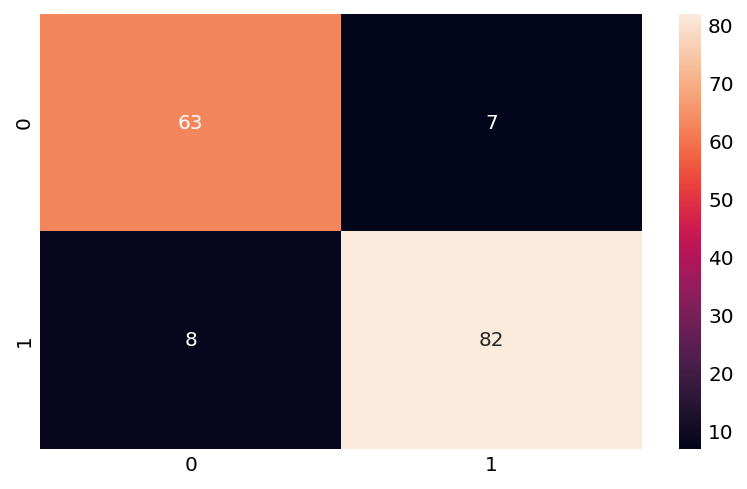

In [14]:
#Using all features on unseen set

target_col = 'personal_loan'
feature_cols = ['age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'securities_account',
       'cd_account', 'online', 'creditcard']
X_unseen = bl_unseen[feature_cols]
y_unseen = bl_unseen[target_col]

lg_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lg_model.fit(X_unseen, y_unseen)
lg_model_score_unseen = cross_val_score(lg_model, X_unseen, y_unseen, cv=5)

y_pred_unseen = lg_model.predict(X_unseen)

y_pp_unseen = lg_model.predict_proba(X_unseen)

#Create the confusion matrix
ac_unseen = accuracy_score(y_unseen, y_pred_unseen)
cm_unseen = confusion_matrix(y_unseen, y_pred_unseen)
sns.heatmap(cm_unseen, annot=True, fmt='d');
print(classification_report(y_unseen, y_pred_unseen))

print('accuracy_unseen = {:7.4f}'.format(lg_model.score(X_unseen, y_unseen)))
print('cross validatio score unseen= {:7.4f}'.format(lg_model_score_unseen.mean()))
print('Accuracy is: ', ac_unseen)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        70
           1       0.91      0.93      0.92        90

    accuracy                           0.91       160
   macro avg       0.91      0.91      0.91       160
weighted avg       0.91      0.91      0.91       160

accuracy_unseen_r =  0.9125
cross validatio score unseen reduced=  0.9062
Accuracy is:  0.9125


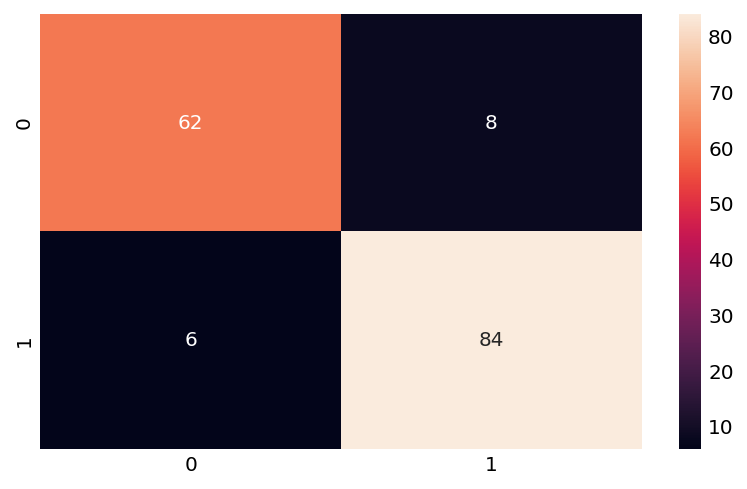

In [19]:
#Using reduced features on unseen set

target_col = 'personal_loan'
feature_reduced = ['income', 'family', 'education', 'ccavg', 'mortgage', 'cd_account', 'online']

X_unseen_r = bl_unseen[feature_reduced]
y_unseen_r = bl_unseen[target_col]

lg_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lg_model.fit(X_unseen_r, y_unseen_r)
lg_model_score_unseen_r = cross_val_score(lg_model, X_unseen_r, y_unseen_r, cv=5)

y_pred_unseen_r = lg_model.predict(X_unseen_r)

y_pp_unseen_r = lg_model.predict_proba(X_unseen_r)

#Create the confusion matrix
ac_unseen_r = accuracy_score(y_unseen_r, y_pred_unseen_r)
cm_unseen_r = confusion_matrix(y_unseen_r, y_pred_unseen_r)
sns.heatmap(cm_unseen_r, annot=True, fmt='d');
print(classification_report(y_unseen_r, y_pred_unseen_r))

print('accuracy_unseen_r = {:7.4f}'.format(lg_model.score(X_unseen_r, y_unseen_r)))
print('cross validatio score unseen reduced= {:7.4f}'.format(lg_model_score_unseen_r.mean()))
print('Accuracy is: ', ac_unseen_r)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4520
           1       0.54      0.33      0.41       480

    accuracy                           0.91      5000
   macro avg       0.73      0.65      0.68      5000
weighted avg       0.89      0.91      0.90      5000

accuracy_whole =  0.6062
cross validatio score whole=  0.9210
Accuracy is:  0.9084


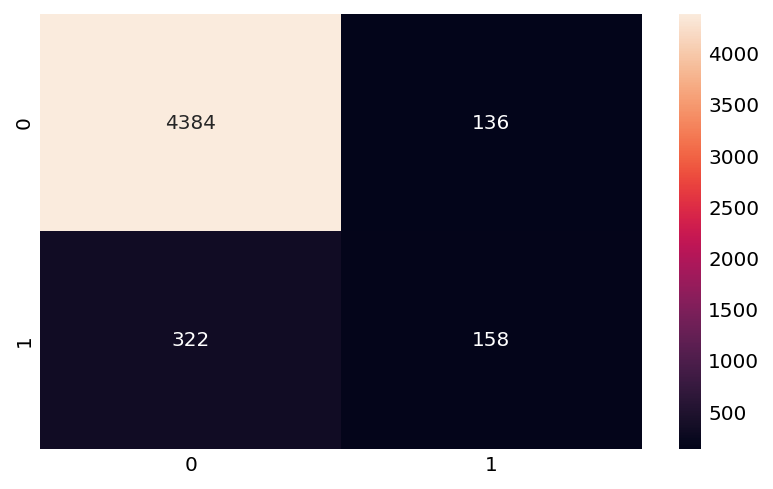

In [17]:
#Using all features on whole dataset

target_col = 'personal_loan'
feature_cols = ['age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'securities_account',
       'cd_account', 'online', 'creditcard']
X_whole = bl[feature_cols]
y_whole = bl[target_col]

lg_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lg_model.fit(X_whole, y_whole)
lg_model_score_whole = cross_val_score(lg_model, X_whole, y_whole, cv=5)

y_pred_whole = lg_model.predict(X_whole)

y_pp_whole = lg_model.predict_proba(X_whole)

#Create the confusion matrix
ac_whole = accuracy_score(y_whole, y_pred_whole)
cm_whole = confusion_matrix(y_whole, y_pred_whole)
sns.heatmap(cm_whole, annot=True, fmt='d');
print(classification_report(y_whole, y_pred_whole))

print('accuracy_whole = {:7.4f}'.format(lg_model.score(X_unseen, y_unseen)))
print('cross validatio score whole= {:7.4f}'.format(lg_model_score_whole.mean()))
print('Accuracy is: ', ac_whole)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4520
           1       0.78      0.61      0.69       480

    accuracy                           0.95      5000
   macro avg       0.87      0.80      0.83      5000
weighted avg       0.94      0.95      0.94      5000

accuracy_whole_r =  0.7625
cross validatio score whole reduced=  0.9458
Accuracy is:  0.9466


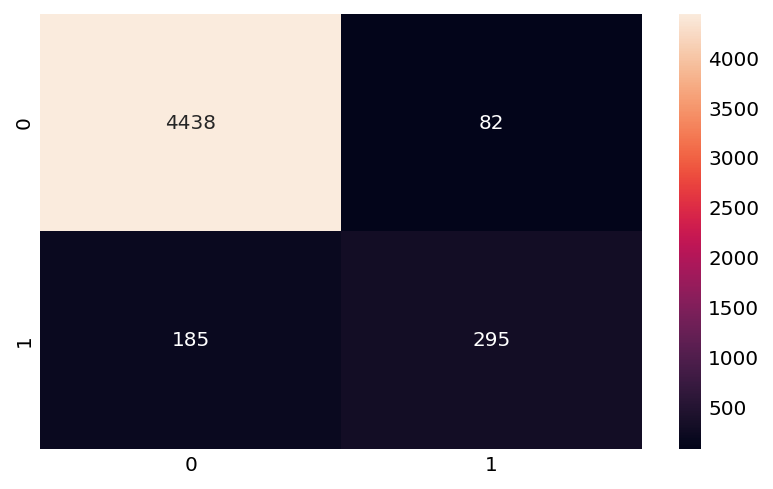

In [18]:
#Using reduced features on whole dataset

target_col = 'personal_loan'
feature_reduced = ['income', 'family', 'education', 'ccavg', 'mortgage', 'cd_account', 'online']

X_whole_r = bl[feature_reduced]
y_whole_r = bl[target_col]

lg_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lg_model.fit(X_whole_r, y_whole_r)
lg_model_score_whole_r = cross_val_score(lg_model, X_whole_r, y_whole_r, cv=5)

y_pred_whole_r = lg_model.predict(X_whole_r)

y_pp_whole_r = lg_model.predict_proba(X_whole_r)

#Create the confusion matrix
ac_whole_r = accuracy_score(y_whole_r, y_pred_whole_r)
cm_whole_r = confusion_matrix(y_whole_r, y_pred_whole_r)
sns.heatmap(cm_whole_r, annot=True, fmt='d');
print(classification_report(y_whole_r, y_pred_whole_r))

print('accuracy_whole_r = {:7.4f}'.format(lg_model.score(X_unseen_r, y_unseen_r)))
print('cross validatio score whole reduced= {:7.4f}'.format(lg_model_score_whole_r.mean()))
print('Accuracy is: ', ac_whole_r)

In [ ]:
##Support Vector Machine Model

              precision    recall  f1-score   support

           0       0.90      0.78      0.83        58
           1       0.83      0.93      0.88        70

    accuracy                           0.86       128
   macro avg       0.87      0.85      0.86       128
weighted avg       0.86      0.86      0.86       128

accuracy_train =  0.8398
accuracy_test =  0.8594
cross validatio score =  0.6484
Accuracy is:  0.859375


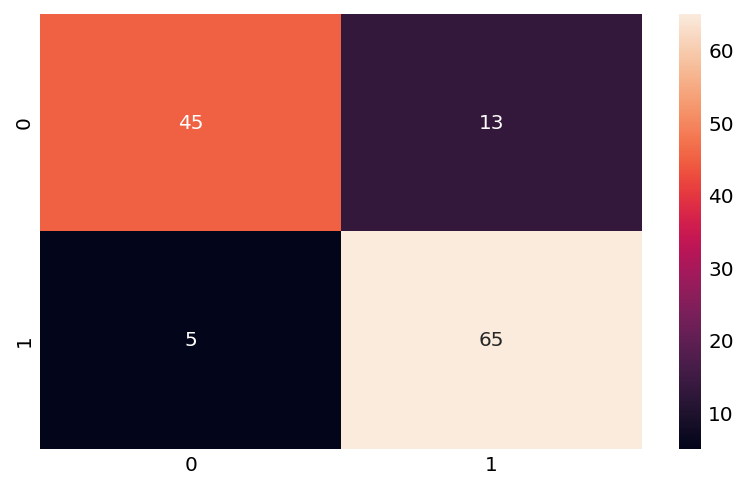

In [20]:
#Using all features on training set

target_col = 'personal_loan'
feature_cols = ['age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'securities_account',
       'cd_account', 'online', 'creditcard']
X = bl_train[feature_cols]
y = bl_train[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', probability=True, max_iter=1000)
svm_model.fit(X_train, y_train)
svm_model.score(X_test, y_test)
svm_model_score = cross_val_score(svm_model, X, y, cv=5)

y_pred = svm_model.predict(X_test)

y_pp = svm_model.predict_proba(X_test)

#Create the confusion matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test, y_pred))

print('accuracy_train = {:7.4f}'.format(svm_model.score(X_train, y_train)))
print('accuracy_test = {:7.4f}'.format(svm_model.score(X_test, y_test)))
print('cross validatio score = {:7.4f}'.format(svm_model_score.mean()))
print('Accuracy is: ', ac)

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        58
           1       0.81      0.77      0.79        70

    accuracy                           0.77       128
   macro avg       0.77      0.77      0.77       128
weighted avg       0.78      0.77      0.77       128

accuracy_train_r =  0.7578
accuracy_test_r =  0.7734
cross validatio score reduced =  0.7562
Accuracy is:  0.7734375


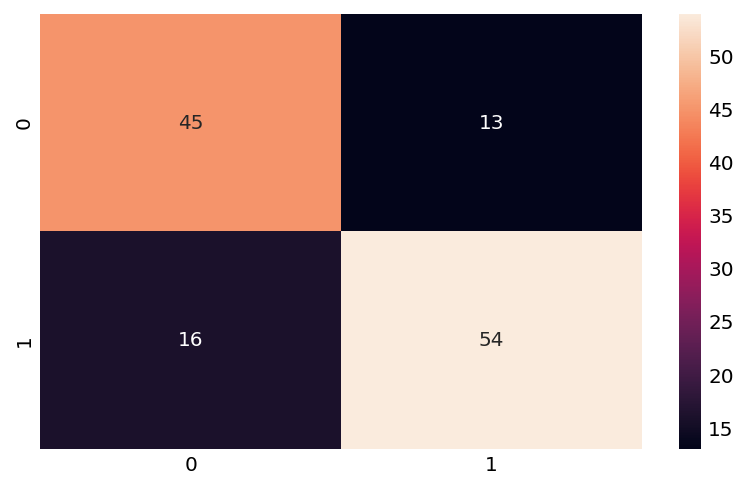

In [22]:
#Using reduced features on training set

target_col = 'personal_loan'
feature_cols_r = ['income', 'family', 'education', 'ccavg', 'mortgage', 'cd_account', 'online']

X_r = bl_train[feature_cols_r]
y_r = bl_train[target_col]

X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', probability=True, max_iter=1000)
svm_model.fit(X_r_train, y_r_train)
svm_model.score(X_r_test, y_r_test)
svm_model_score_r = cross_val_score(svm_model, X_r, y_r, cv=5)

y_r_pred = svm_model.predict(X_r_test)

y_r_pp = svm_model.predict_proba(X_r_test)

#Create the confusion matrix
ac_r = accuracy_score(y_r_test, y_r_pred)
cm_r= confusion_matrix(y_r_test, y_r_pred)
sns.heatmap(cm_r, annot=True, fmt='d');
print(classification_report(y_r_test, y_r_pred))

print('accuracy_train_r = {:7.4f}'.format(svm_model.score(X_r_train, y_r_train)))
print('accuracy_test_r = {:7.4f}'.format(svm_model.score(X_r_test, y_r_test)))
print('cross validatio score reduced = {:7.4f}'.format(svm_model_score_r.mean()))
print('Accuracy is: ', ac_r)

              precision    recall  f1-score   support

           0       0.67      0.63      0.65        70
           1       0.72      0.76      0.74        90

    accuracy                           0.70       160
   macro avg       0.70      0.69      0.69       160
weighted avg       0.70      0.70      0.70       160

accuracy_unseen =  0.7000
cross validatio score unseen =  0.5875
Accuracy is:  0.7


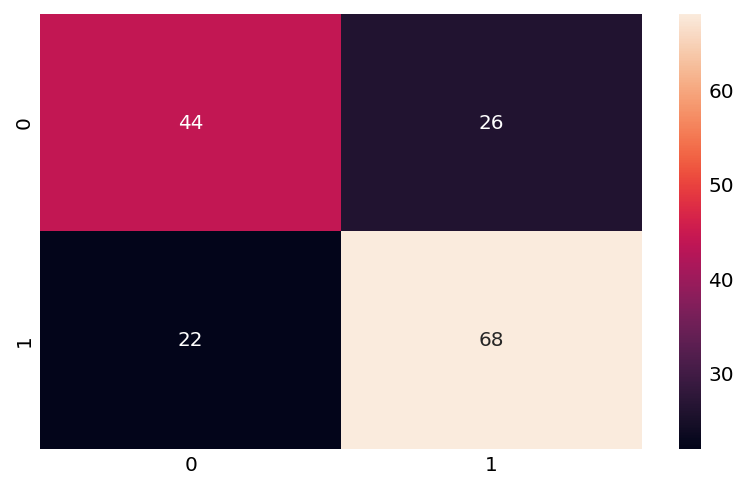

In [23]:
#Using all features on unseen set

target_col = 'personal_loan'
feature_cols = ['age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'securities_account',
       'cd_account', 'online', 'creditcard']
X_unseen = bl_unseen[feature_cols]
y_unseen = bl_unseen[target_col]

svm_model = SVC(kernel='linear', probability=True, max_iter=1000)
svm_model.fit(X_unseen, y_unseen)
svm_model.score(X_unseen, y_unseen)
svm_model_score_unseen = cross_val_score(svm_model, X_unseen, y_unseen, cv=5)

y_unseen_pred = svm_model.predict(X_unseen)

y_unseen_pp = svm_model.predict_proba(X_unseen)

#Create the confusion matrix
ac_unseen = accuracy_score(y_unseen, y_unseen_pred)
cm_unseen = confusion_matrix(y_unseen, y_unseen_pred)
sns.heatmap(cm_unseen, annot=True, fmt='d');
print(classification_report(y_unseen, y_unseen_pred))

print('accuracy_unseen = {:7.4f}'.format(svm_model.score(X_unseen, y_unseen)))
print('cross validatio score unseen = {:7.4f}'.format(svm_model_score_unseen.mean()))
print('Accuracy is: ', ac_unseen)

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        70
           1       0.84      0.87      0.85        90

    accuracy                           0.83       160
   macro avg       0.83      0.83      0.83       160
weighted avg       0.83      0.83      0.83       160

accuracy_unseen_r =  0.8313
cross validatio score unseen reduced =  0.5938
Accuracy is:  0.83125


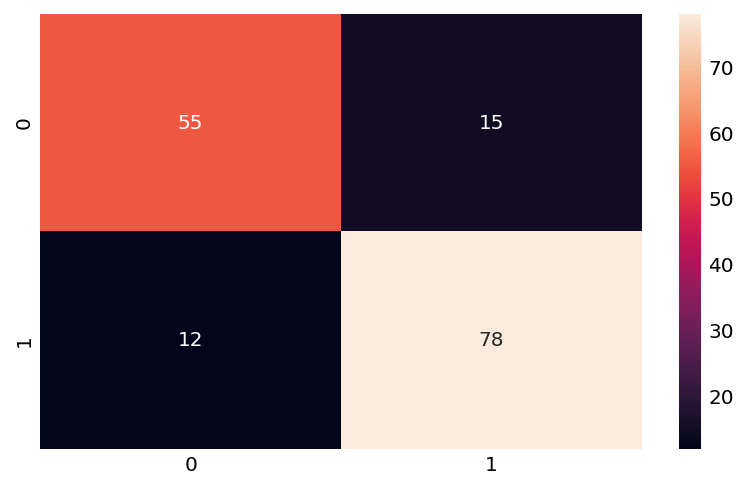

In [25]:
#Using reduced features on unseen set

target_col = 'personal_loan'
feature_cols_r = ['income', 'family', 'education', 'ccavg', 'mortgage', 'cd_account', 'online']

X_unseen_r = bl_unseen[feature_cols_r]
y_unseen_r = bl_unseen[target_col]

svm_model = SVC(kernel='linear', probability=True, max_iter=1000)
svm_model.fit(X_unseen_r, y_unseen_r)
svm_model.score(X_unseen_r, y_unseen_r)
svm_model_score_unseen_r = cross_val_score(svm_model, X_unseen_r, y_unseen_r, cv=5)

y_unseen_r_pred = svm_model.predict(X_unseen_r)

y_unseen_r_pp = svm_model.predict_proba(X_unseen_r)

#Create the confusion matrix
ac_unseen_r = accuracy_score(y_unseen_r, y_unseen_r_pred)
cm_unseen_r = confusion_matrix(y_unseen_r, y_unseen_r_pred)
sns.heatmap(cm_unseen_r, annot=True, fmt='d');
print(classification_report(y_unseen_r, y_unseen_r_pred))

print('accuracy_unseen_r = {:7.4f}'.format(svm_model.score(X_unseen_r, y_unseen_r)))
print('cross validatio score unseen reduced = {:7.4f}'.format(svm_model_score_unseen_r.mean()))
print('Accuracy is: ', ac_unseen_r)

              precision    recall  f1-score   support

           0       0.92      0.40      0.56      4520
           1       0.11      0.68      0.19       480

    accuracy                           0.43      5000
   macro avg       0.52      0.54      0.37      5000
weighted avg       0.84      0.43      0.52      5000

accuracy_whole =  0.4264
cross validatio score whole =  0.6978
Accuracy is:  0.4264


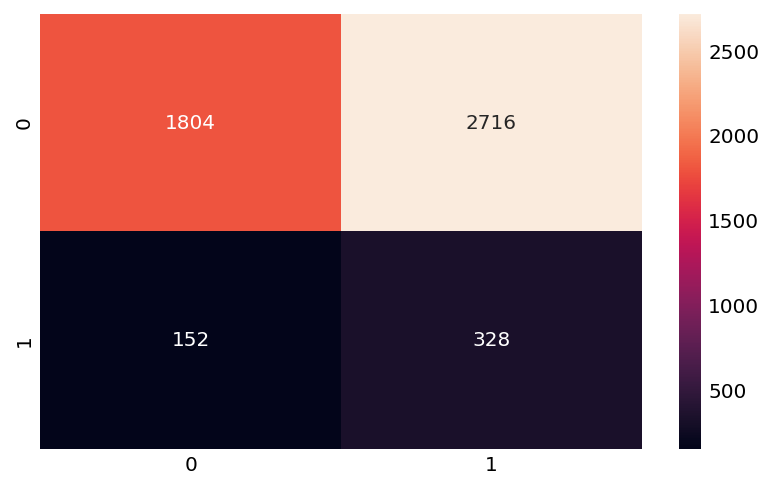

In [27]:
#Using all features on whole dataset

target_col = 'personal_loan'
feature_cols = ['age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'securities_account',
       'cd_account', 'online', 'creditcard']
X_whole = bl[feature_cols]
y_whole = bl[target_col]

svm_model = SVC(kernel='linear', probability=True, max_iter=1000)
svm_model.fit(X_whole, y_whole)
svm_model.score(X_whole, y_whole)
svm_model_score_whole = cross_val_score(svm_model, X_whole, y_whole, cv=5)

y_whole_pred = svm_model.predict(X_whole)

y_whole_pp = svm_model.predict_proba(X_whole)

#Create the confusion matrix
ac_whole = accuracy_score(y_whole, y_whole_pred)
cm_whole = confusion_matrix(y_whole, y_whole_pred)
sns.heatmap(cm_whole, annot=True, fmt='d');
print(classification_report(y_whole, y_whole_pred))

print('accuracy_whole = {:7.4f}'.format(svm_model.score(X_whole, y_whole)))
print('cross validatio score whole = {:7.4f}'.format(svm_model_score_whole.mean()))
print('Accuracy is: ', ac_whole)

              precision    recall  f1-score   support

           0       0.96      0.79      0.86      4520
           1       0.25      0.66      0.36       480

    accuracy                           0.78      5000
   macro avg       0.60      0.72      0.61      5000
weighted avg       0.89      0.78      0.82      5000

accuracy_whole_r =  0.7762
cross validatio score whole reduced =  0.6770
Accuracy is:  0.7762


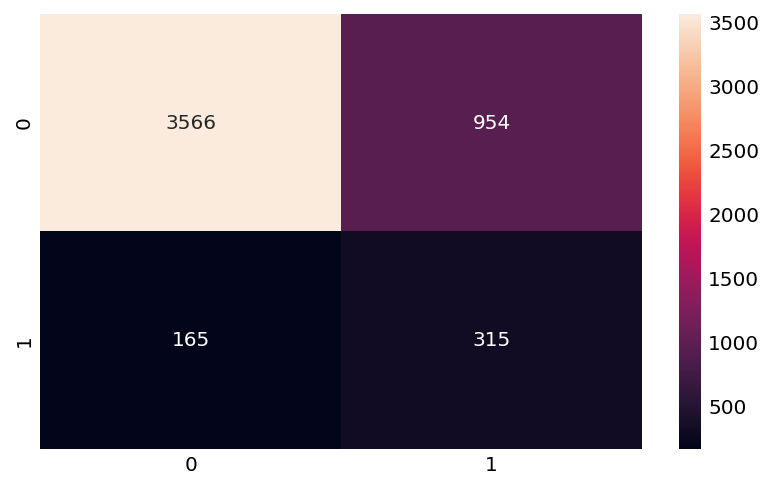

In [28]:
#Using reduced features on whole dataset

target_col = 'personal_loan'
feature_cols_r = ['income', 'family', 'education', 'ccavg', 'mortgage', 'cd_account', 'online']

X_whole_r = bl[feature_cols_r]
y_whole_r = bl[target_col]

svm_model = SVC(kernel='linear', probability=True, max_iter=1000)
svm_model.fit(X_whole_r, y_whole_r)
svm_model.score(X_whole_r, y_whole_r)
svm_model_score_whole_r = cross_val_score(svm_model, X_whole_r, y_whole_r, cv=5)

y_whole_r_pred = svm_model.predict(X_whole_r)

y_whole_r_pp = svm_model.predict_proba(X_whole_r)

#Create the confusion matrix
ac_whole_r = accuracy_score(y_whole, y_whole_r_pred)
cm_whole_r = confusion_matrix(y_whole, y_whole_r_pred)
sns.heatmap(cm_whole_r, annot=True, fmt='d');
print(classification_report(y_whole_r, y_whole_r_pred))

print('accuracy_whole_r = {:7.4f}'.format(svm_model.score(X_whole_r, y_whole_r)))
print('cross validatio score whole reduced = {:7.4f}'.format(svm_model_score_whole_r.mean()))
print('Accuracy is: ', ac_whole_r)

In [ ]:
##Naive Bayes Model

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        58
           1       0.90      0.77      0.83        70

    accuracy                           0.83       128
   macro avg       0.83      0.83      0.83       128
weighted avg       0.84      0.83      0.83       128

accuracy_train =  0.8301
accuracy_test =  0.8281
cross validatio score =  0.8250
Accuracy is:  0.828125


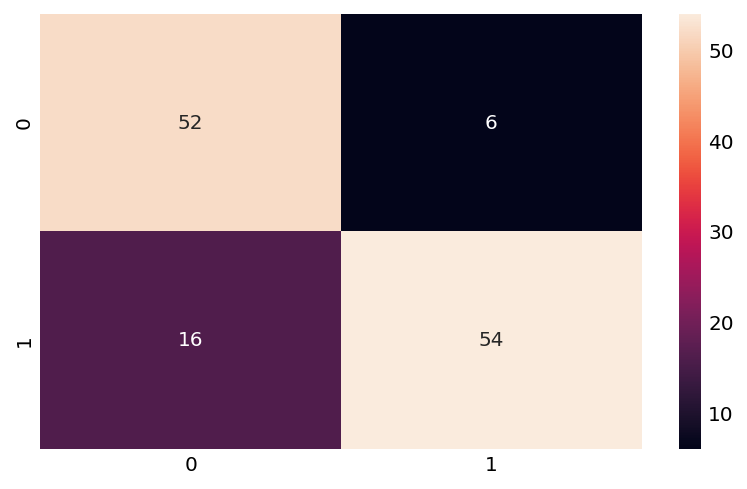

In [30]:
#Using all features on training set

target_col = 'personal_loan'
feature_cols = ['age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'securities_account',
       'cd_account', 'online', 'creditcard']
X = bl_train[feature_cols]
y = bl_train[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_model.score(X_test, y_test)
nb_model_score = cross_val_score(nb_model, X, y, cv=5)

y_pred = nb_model.predict(X_test)

y_pp = nb_model.predict_proba(X_test)

#Create the confusion matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test, y_pred))

print('accuracy_train = {:7.4f}'.format(nb_model.score(X_train, y_train)))
print('accuracy_test = {:7.4f}'.format(nb_model.score(
    X_test, y_test)))
print('cross validatio score = {:7.4f}'.format(nb_model_score.mean()))
print('Accuracy is: ', ac)

              precision    recall  f1-score   support

           0       0.78      0.90      0.83        58
           1       0.90      0.79      0.84        70

    accuracy                           0.84       128
   macro avg       0.84      0.84      0.84       128
weighted avg       0.84      0.84      0.84       128

accuracy_train_r =  0.8301
accuracy_test_r =  0.8359
cross validatio score reduced =  0.8297
Accuracy is:  0.8359375


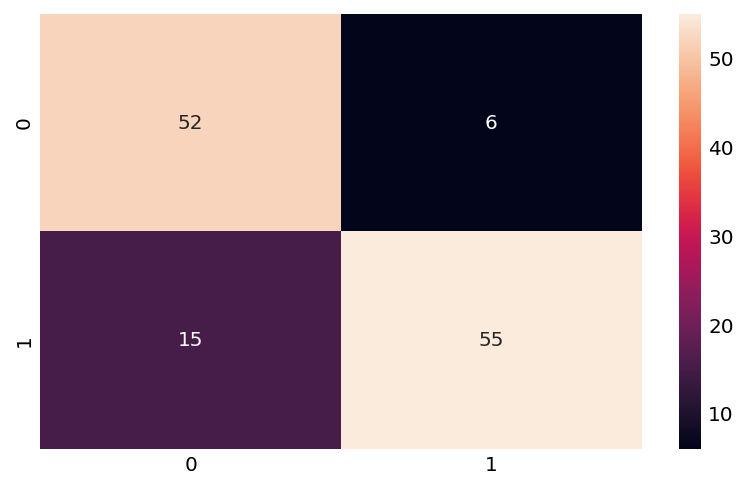

In [32]:
#Using reduced features on training set

target_col = 'personal_loan'
feature_cols_r = ['income', 'family', 'education', 'ccavg', 'mortgage', 'cd_account', 'online']

X_r = bl_train[feature_cols_r]
y_r = bl_train[target_col]

X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_r_train, y_r_train)
nb_model.score(X_r_test, y_r_test)
nb_model_score_r = cross_val_score(nb_model, X_r, y_r, cv=5)

y_r_pred = nb_model.predict(X_r_test)

y_r_pp = nb_model.predict_proba(X_r_test)

#Create the confusion matrix
ac_r = accuracy_score(y_r_test, y_r_pred)
cm_r = confusion_matrix(y_r_test, y_r_pred)
sns.heatmap(cm_r, annot=True, fmt='d');
print(classification_report(y_r_test, y_r_pred))

print('accuracy_train_r = {:7.4f}'.format(nb_model.score(X_r_train, y_r_train)))
print('accuracy_test_r = {:7.4f}'.format(nb_model.score(X_r_test, y_r_test)))
print('cross validatio score reduced = {:7.4f}'.format(nb_model_score_r.mean()))
print('Accuracy is: ', ac_r)

              precision    recall  f1-score   support

           0       0.77      0.89      0.82        70
           1       0.90      0.79      0.84        90

    accuracy                           0.83       160
   macro avg       0.83      0.84      0.83       160
weighted avg       0.84      0.83      0.83       160

accuracy_unseen =  0.8313
cross validatio score unseen =  0.8187
Accuracy is:  0.83125


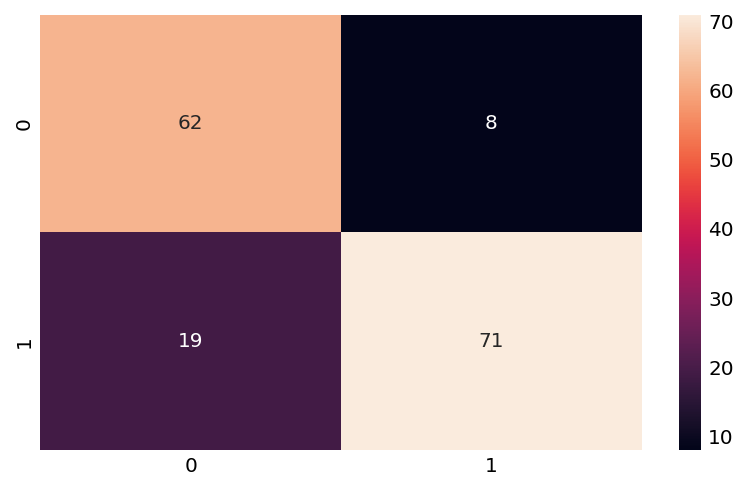

In [35]:
#Using all features on unseen set

target_col = 'personal_loan'
feature_cols = ['age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'securities_account',
       'cd_account', 'online', 'creditcard']
X_unseen = bl_unseen[feature_cols]
y_unseen = bl_unseen[target_col]

nb_model = GaussianNB()
nb_model.fit(X_unseen, y_unseen)
nb_model.score(X_unseen, y_unseen)
nb_model_score_unseen = cross_val_score(nb_model, X_unseen, y_unseen, cv=5)

y_unseen_pred = nb_model.predict(X_unseen)

y_unseen_pp = nb_model.predict_proba(X_unseen)

#Create the confusion matrix
ac_unseen = accuracy_score(y_unseen, y_unseen_pred)
cm_unseen = confusion_matrix(y_unseen, y_unseen_pred)
sns.heatmap(cm_unseen, annot=True, fmt='d');
print(classification_report(y_unseen, y_unseen_pred))

print('accuracy_unseen = {:7.4f}'.format(nb_model.score(X_unseen, y_unseen)))
print('cross validatio score unseen = {:7.4f}'.format(nb_model_score_unseen.mean()))
print('Accuracy is: ', ac_unseen)

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        70
           1       0.90      0.80      0.85        90

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.85      0.84      0.84       160

accuracy_unseen_r =  0.8375
cross validation score unseen reduced =  0.8250
Accuracy is:  0.8375


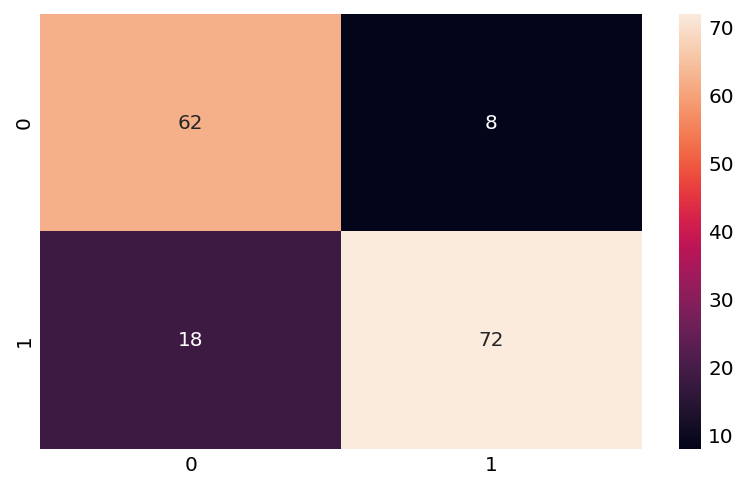

In [36]:
#Using reduced features on unseen set

target_col = 'personal_loan'
feature_cols_r = ['income', 'family', 'education', 'ccavg', 'mortgage', 'cd_account', 'online']

X_unseen_r = bl_unseen[feature_cols_r]
y_unseen_r = bl_unseen[target_col]

nb_model = GaussianNB()
nb_model.fit(X_unseen_r, y_unseen_r)
nb_model.score(X_unseen_r, y_unseen_r)
nb_model_score_unseen_r = cross_val_score(nb_model, X_unseen_r, y_unseen_r, cv=5)

y_unseen_r_pred = nb_model.predict(X_unseen_r)

y_unseen_r_pp = nb_model.predict_proba(X_unseen_r)

#Create the confusion matrix
ac_unseen_r = accuracy_score(y_unseen_r, y_unseen_r_pred)
cm_unseen_r = confusion_matrix(y_unseen_r, y_unseen_r_pred)
sns.heatmap(cm_unseen_r, annot=True, fmt='d');
print(classification_report(y_unseen_r, y_unseen_r_pred))

print('accuracy_unseen_r = {:7.4f}'.format(nb_model.score(X_unseen_r, y_unseen_r)))
print('cross validation score unseen reduced = {:7.4f}'.format(nb_model_score_unseen_r.mean()))
print('Accuracy is: ', ac_unseen_r)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      4520
           1       0.44      0.59      0.50       480

    accuracy                           0.89      5000
   macro avg       0.70      0.76      0.72      5000
weighted avg       0.91      0.89      0.90      5000

accuracy_whole =  0.8890
cross validatio score whole =  0.8874
Accuracy is:  0.889


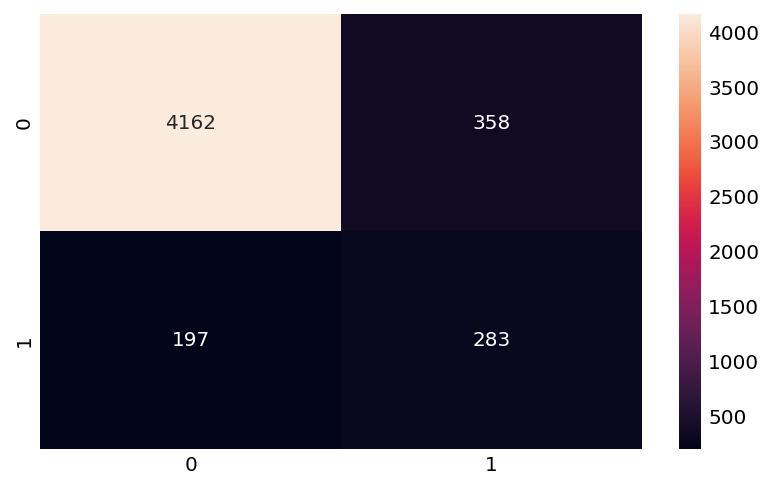

In [37]:
#Using all features on whole dataset

target_col = 'personal_loan'
feature_cols = ['age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'securities_account',
       'cd_account', 'online', 'creditcard']
X_whole = bl[feature_cols]
y_whole = bl[target_col]

nb_model = GaussianNB()
nb_model.fit(X_whole, y_whole)
nb_model.score(X_whole, y_whole)
nb_model_score_whole = cross_val_score(nb_model, X_whole, y_whole, cv=5)

y_whole_pred = nb_model.predict(X_whole)

y_whole_pp = nb_model.predict_proba(X_whole)

#Create the confusion matrix
ac_whole = accuracy_score(y_whole, y_whole_pred)
cm_whole = confusion_matrix(y_whole, y_whole_pred)
sns.heatmap(cm_whole, annot=True, fmt='d');
print(classification_report(y_whole, y_whole_pred))

print('accuracy_whole = {:7.4f}'.format(nb_model.score(X_whole, y_whole)))
print('cross validatio score whole = {:7.4f}'.format(nb_model_score_whole.mean()))
print('Accuracy is: ', ac_whole)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      4520
           1       0.43      0.59      0.49       480

    accuracy                           0.89      5000
   macro avg       0.69      0.75      0.71      5000
weighted avg       0.90      0.89      0.89      5000

accuracy_whole_r =  0.8852
cross validatio score whole reduced =  0.8848
Accuracy is:  0.8852


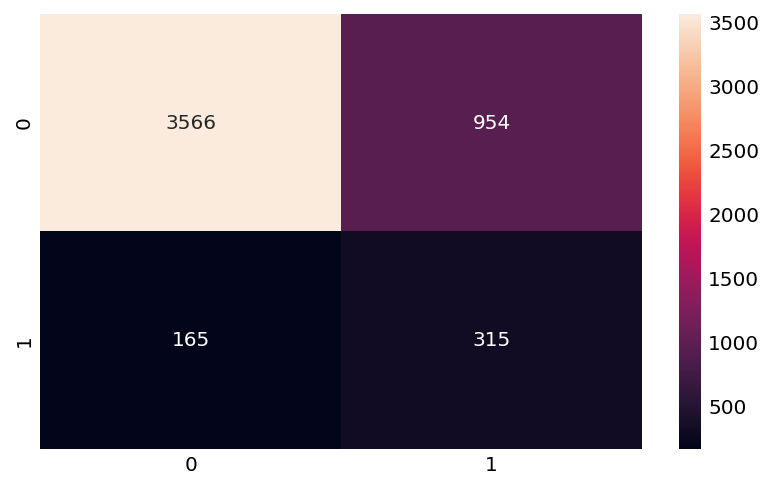

In [38]:
#Using reduced features on whole dataset

target_col = 'personal_loan'
feature_cols_r = ['income', 'family', 'education', 'ccavg', 'mortgage', 'cd_account', 'online']

X_whole_r = bl[feature_cols_r]
y_whole_r = bl[target_col]

nb_model = GaussianNB()
nb_model.fit(X_whole_r, y_whole_r)
nb_model.score(X_whole_r, y_whole_r)
nb_model_score_whole_r = cross_val_score(nb_model, X_whole_r, y_whole_r, cv=5)

y_whole_r_pred = nb_model.predict(X_whole_r)

y_whole_r_pp = nb_model.predict_proba(X_whole_r)

#Create the confusion matrix
ac_whole_r = accuracy_score(y_whole_r, y_whole_r_pred)
cm_whole = confusion_matrix(y_whole_r, y_whole_r_pred)
sns.heatmap(cm_whole_r, annot=True, fmt='d');
print(classification_report(y_whole_r, y_whole_r_pred))

print('accuracy_whole_r = {:7.4f}'.format(nb_model.score(X_whole_r, y_whole_r)))
print('cross validatio score whole reduced = {:7.4f}'.format(nb_model_score_whole_r.mean()))
print('Accuracy is: ', ac_whole_r)